## BUILD AN ACCURATE 2D CNN FOR MNIST DIGIT RECONGNITION
## CREATED BY HCY 20200717 20:21

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
import tensorflow as tf


## 配置gpu使用，防止gpu内存不够用报错
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

E:\Anaconda5.2\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\Anaconda5.2\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\Anaconda5.2\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\Anaconda5.2\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of 

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
type(X_train)

numpy.ndarray

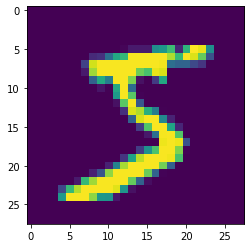

In [5]:
plt.imshow(X_train[0])
plt.show()

In [6]:
print(X_train.shape)

(60000, 28, 28)


In [7]:
print(X_test.shape)

(10000, 28, 28)


In [8]:
X_train.max()

255

In [9]:
X_train = X_train / 255.
X_test = X_test / 255.

In [10]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [11]:
input_shape = X_train[0].shape

In [23]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, kernel_initializer='he_uniform'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform'))
# model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [25]:
tf.keras.losses??

In [28]:
model.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [16]:
model.fit??

In [29]:
history = model.fit(x=X_train, y=y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2066 - accuracy: 0.9376 - val_loss: 0.0504 - val_accuracy: 0.9833
Epoch 2/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0798 - accuracy: 0.9757 - val_loss: 0.0391 - val_accuracy: 0.9864
Epoch 3/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0587 - accuracy: 0.9826 - val_loss: 0.0338 - val_accuracy: 0.9888
Epoch 4/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0482 - accuracy: 0.9852 - val_loss: 0.0355 - val_accuracy: 0.9882
Epoch 5/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0436 - accuracy: 0.9862 - val_loss: 0.0326 - val_accuracy: 0.9904
Epoch 6/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0341 - accuracy: 0.9889 - val_loss: 0.0285 - val_accuracy: 0.9914
Epoch 7/10
60000/60000 [==============================] 

In [30]:
def plot_learningCureve(history):
    epoch_range = range(1, 11)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

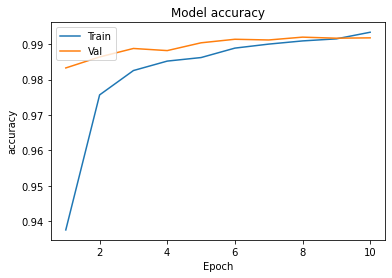

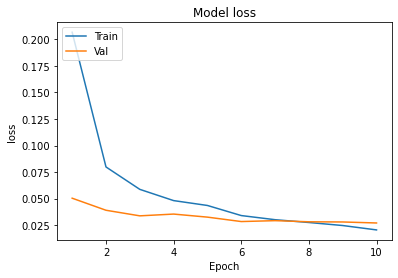

In [31]:
plot_learningCureve(history)

In [32]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 67us/sample - loss: 0.0271 - accuracy: 0.9918


[0.02710750355659161, 0.9918]

In [39]:
import matplotlib.pyplot as plt
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

#   plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
#                                 100*np.max(predictions_array),
#                                 class_names[true_label]),
#                                 color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [40]:
y_prediction = model.predict(X_test)

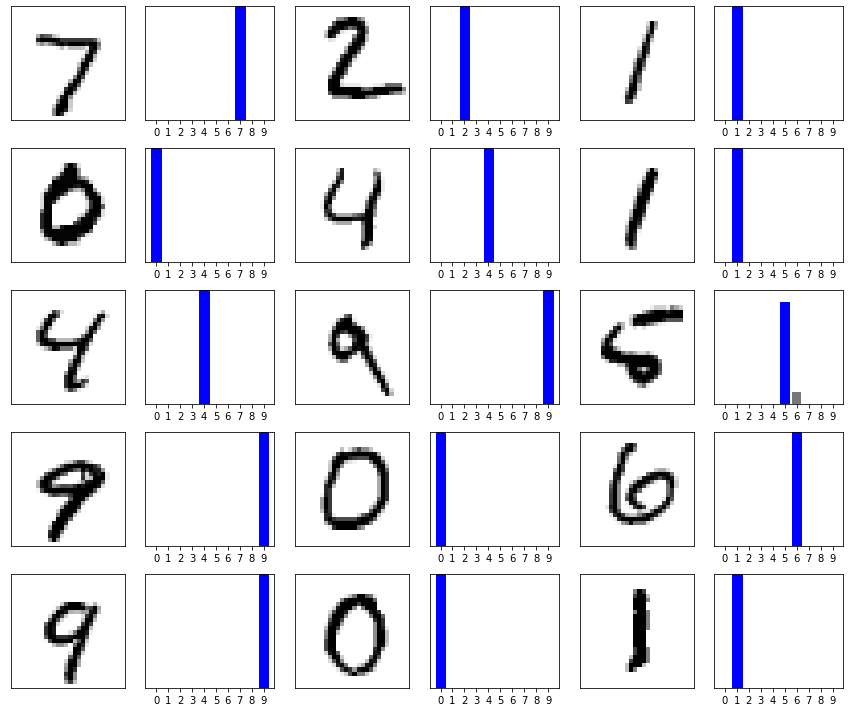

In [42]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, y_prediction[i], y_test, X_test.reshape(10000, 28, 28))
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, y_prediction[i], y_test)
plt.tight_layout()
plt.show()

(10000, 28, 28, 1)